In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import ehtplot
from matplotlib import pyplot as plt

from common import viz
from common import io_ipole as io

In [2]:
imgP  = io.load_img('model/Illinois_thermal/230GHz/Ma+0.5_w5/img_s05990_Rh40_i30.h5')
summP = pd.read_csv('cache/Illinois_thermal_w5/Ma+0.5_i30/summ_Rh40_230GHz.tsv', sep='\t').iloc[-9]

imgF  = io.load_img('model/Illinois_thermal/230GHz/Sa0_w5/img_s05990_Rh1_i10.h5')
summF = pd.read_csv('cache/Illinois_thermal_w5/Sa0_i10/summ_Rh1_230GHz.tsv', sep='\t').iloc[-9]

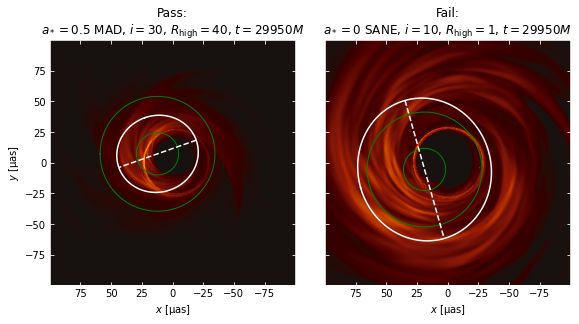

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)
fig.tight_layout()

viz.show(imgP, ax=axes[0], cmap='afmhot_10us')
viz.ellipse(*summP[-5:-3], 34.4, 34.4, 0, ax=axes[0], diameter=True, color='green', linewidth=1)
viz.ellipse(*summP[-5:-3], 93.6, 93.6, 0, ax=axes[0], diameter=True, color='green', linewidth=1)
viz.ellipse(*summP[-5:],                  ax=axes[0], diameter=True, color='w')
axes[0].tick_params(
    axis='both',
    direction='in',
    top=True,
    right=True,
    color='w',
)
for spine in axes[0].spines.values():
    spine.set_edgecolor('w')
axes[0].set_title('Pass:\n$a_*=0.5$ MAD, $i=30$, $R_\mathrm{high}=40$, $t=29950M$')

viz.show(imgF, ax=axes[1], cmap='afmhot_10us')
viz.ellipse(*summF[-5:-3], 34.4, 34.4, 0, ax=axes[1], diameter=True, color='green', linewidth=1)
viz.ellipse(*summF[-5:-3], 93.6, 93.6, 0, ax=axes[1], diameter=True, color='green', linewidth=1)
viz.ellipse(*summF[-5:],                  ax=axes[1], diameter=True, color='w')
axes[1].set_ylabel(None)
axes[1].tick_params(
    axis='both',
    direction='in',
    top=True,
    right=True,
    color='w',
)
for spine in axes[1].spines.values():
    spine.set_edgecolor('w')
axes[1].set_title('Fail:\n$a_*=0$ SANE, $i=10$, $R_\mathrm{high}=1$, $t=29950M$')

fig.savefig('output/passfail_sz.pdf', bbox_inches='tight')